In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BankChurners.CSV')


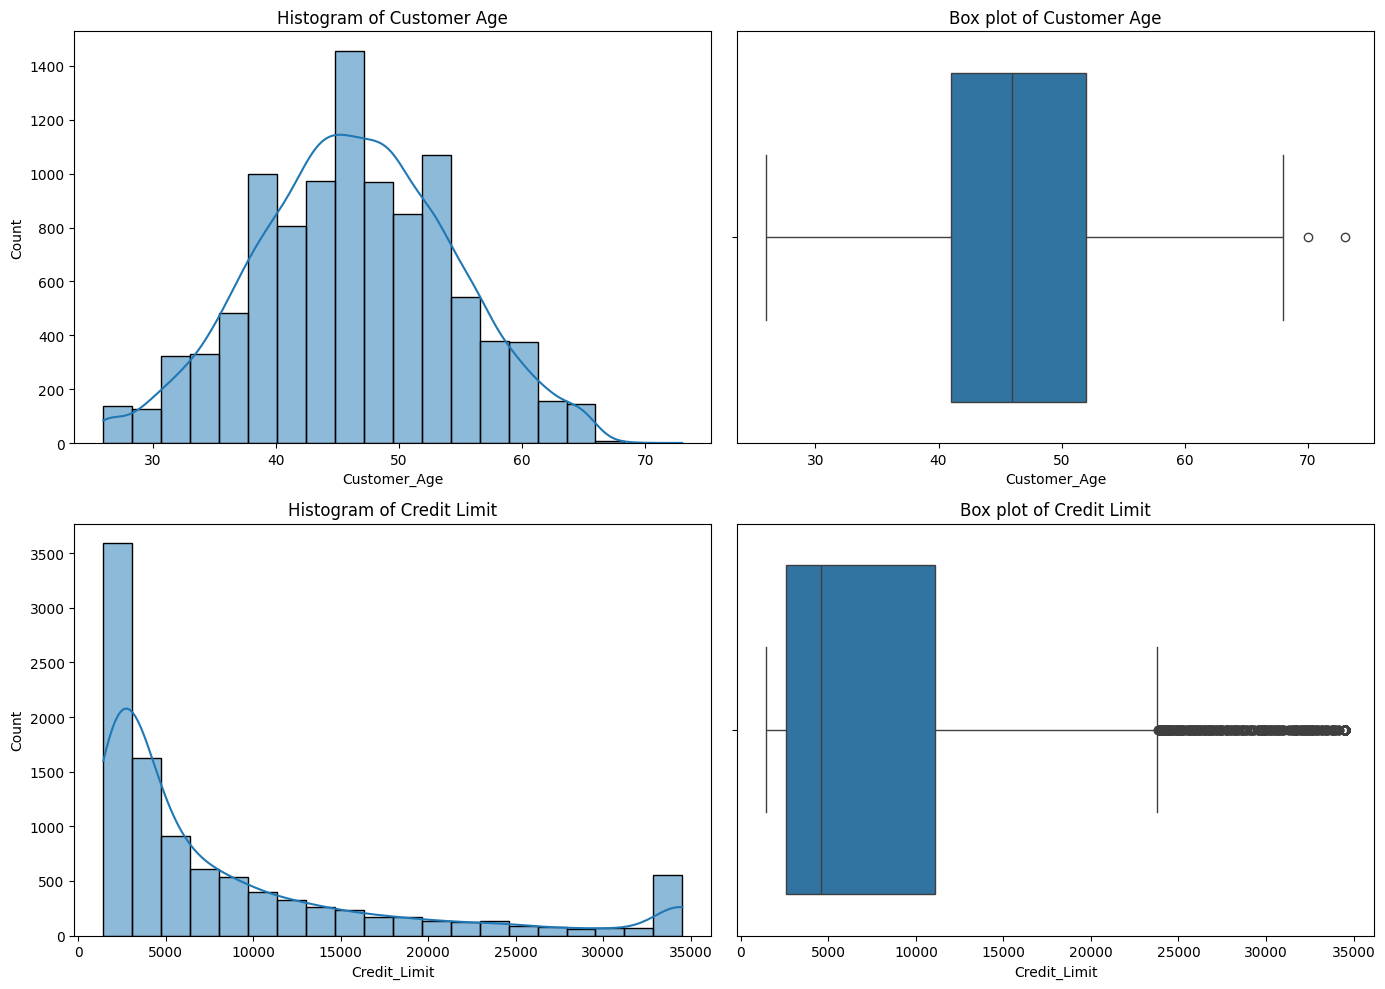

c:\Users\whizy\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10127.
  res = hypotest_fun_out(*samples, **kwds)


Customer_Age distribution: Non-Normal
Credit_Limit distribution: Non-Normal
Number of outliers in Customer_Age: 2
Number of outliers in Credit_Limit: 984


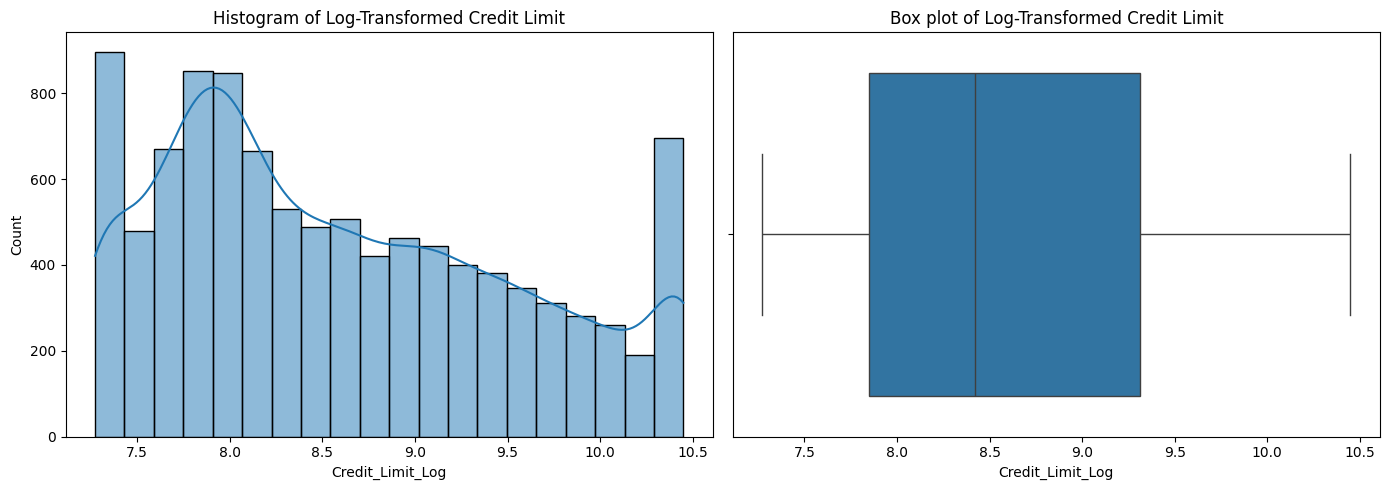

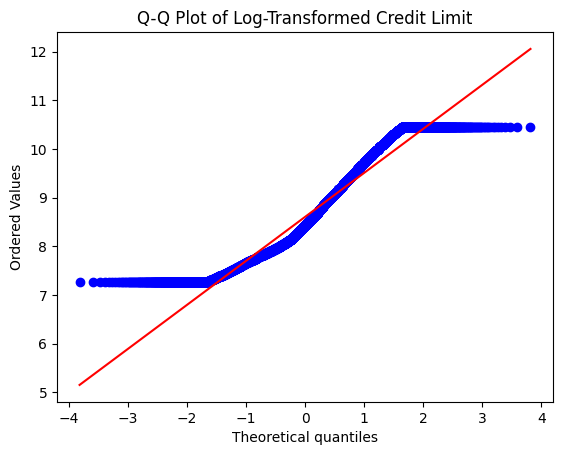

In [5]:
# Visualizations
# Histograms and Box plots for 'Customer_Age' and 'Credit_Limit'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Customer_Age
sns.histplot(df['Customer_Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Customer Age')

# Box plot for Customer_Age
sns.boxplot(x=df['Customer_Age'], ax=axes[0, 1])
axes[0, 1].set_title('Box plot of Customer Age')

# Histogram for Credit_Limit
sns.histplot(df['Credit_Limit'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Credit Limit')

# Box plot for Credit_Limit
sns.boxplot(x=df['Credit_Limit'], ax=axes[1, 1])
axes[1, 1].set_title('Box plot of Credit Limit')

plt.tight_layout()
plt.show()

# Identify the type of distribution each variable appears to have
customer_age_dist = "Normal" if stats.shapiro(df['Customer_Age'])[1] > 0.05 else "Non-Normal"
credit_limit_dist = "Normal" if stats.shapiro(df['Credit_Limit'])[1] > 0.05 else "Non-Normal"

print(f"Customer_Age distribution: {customer_age_dist}")
print(f"Credit_Limit distribution: {credit_limit_dist}")

# Determine the number of outliers for each variable
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[(series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))]
    return len(outliers)

customer_age_outliers = count_outliers(df['Customer_Age'])
credit_limit_outliers = count_outliers(df['Credit_Limit'])

print(f"Number of outliers in Customer_Age: {customer_age_outliers}")
print(f"Number of outliers in Credit_Limit: {credit_limit_outliers}")

# Bonus: Adjust and re-plot 'Credit_Limit' if necessary
if credit_limit_dist == "Non-Normal":
    df['Credit_Limit_Log'] = np.log1p(df['Credit_Limit'])
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram for Credit_Limit_Log
    sns.histplot(df['Credit_Limit_Log'], bins=20, kde=True, ax=axes[0])
    axes[0].set_title('Histogram of Log-Transformed Credit Limit')

    # Box plot for Credit_Limit_Log
    sns.boxplot(x=df['Credit_Limit_Log'], ax=axes[1])
    axes[1].set_title('Box plot of Log-Transformed Credit Limit')

    plt.tight_layout()
    plt.show()
    # Normal Probability Plot (Q-Q Plot) for Log-Transformed Credit Limit
    stats.probplot(df['Credit_Limit_Log'], dist="norm", plot=plt)
    plt.title('Q-Q Plot of Log-Transformed Credit Limit')
    plt.show()

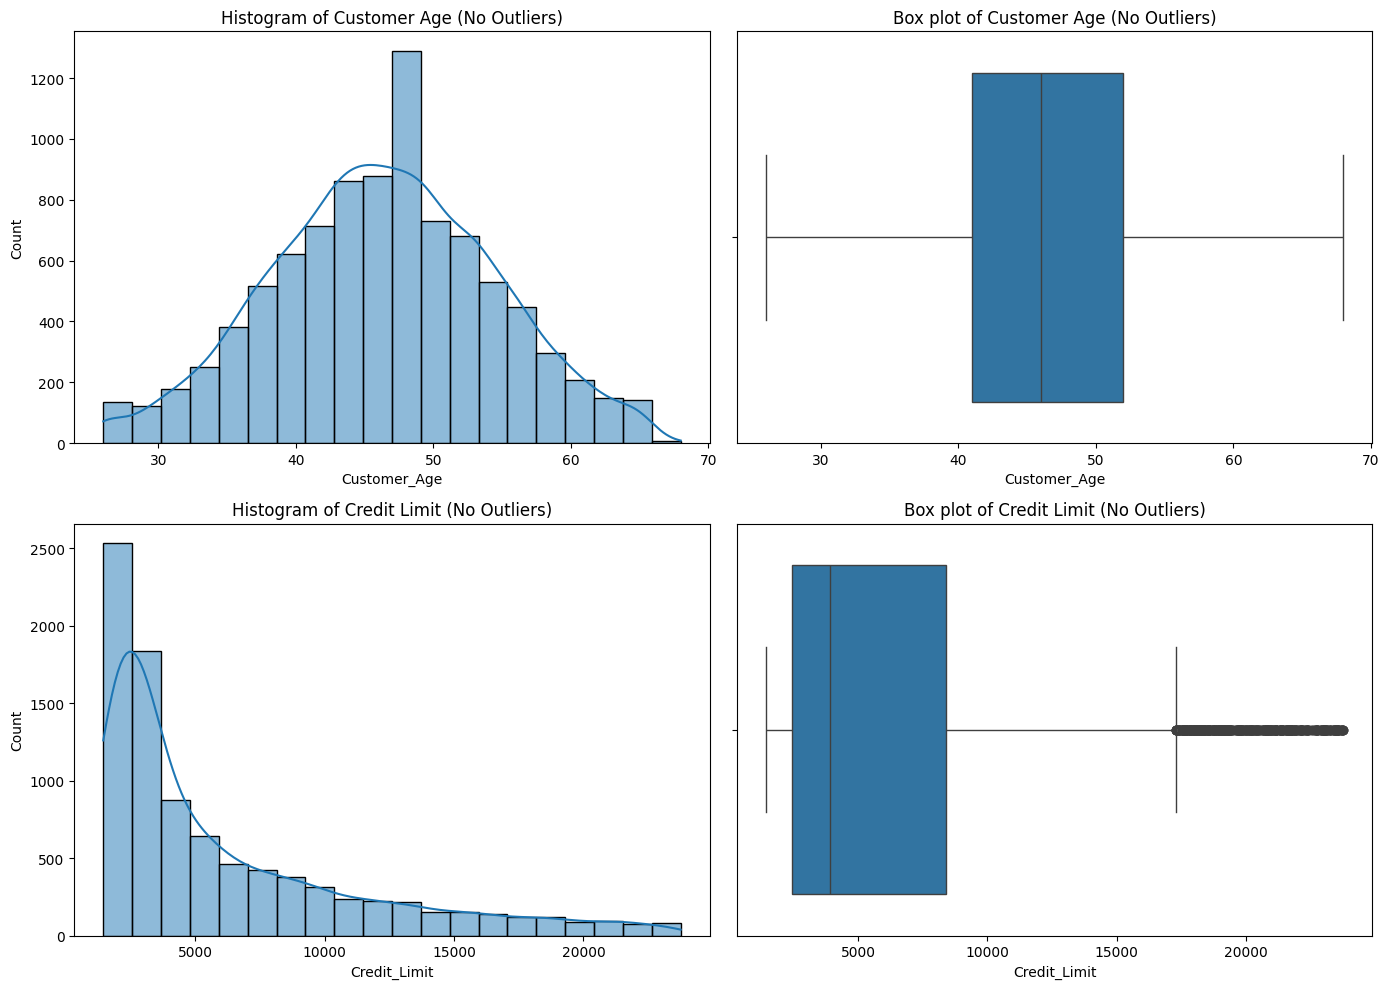

In [6]:
# Step 1: Identify Outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 2: Remove Outliers for 'Customer_Age' and 'Credit_Limit'
df_no_outliers = remove_outliers(df, 'Customer_Age')
df_no_outliers = remove_outliers(df_no_outliers, 'Credit_Limit')

# Step 3: Visualize the modified data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Customer_Age without outliers
sns.histplot(df_no_outliers['Customer_Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Customer Age (No Outliers)')

# Box plot for Customer_Age without outliers
sns.boxplot(x=df_no_outliers['Customer_Age'], ax=axes[0, 1])
axes[0, 1].set_title('Box plot of Customer Age (No Outliers)')

# Histogram for Credit_Limit without outliers
sns.histplot(df_no_outliers['Credit_Limit'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Credit Limit (No Outliers)')

# Box plot for Credit_Limit without outliers
sns.boxplot(x=df_no_outliers['Credit_Limit'], ax=axes[1, 1])
axes[1, 1].set_title('Box plot of Credit Limit (No Outliers)')

plt.tight_layout()
plt.show()

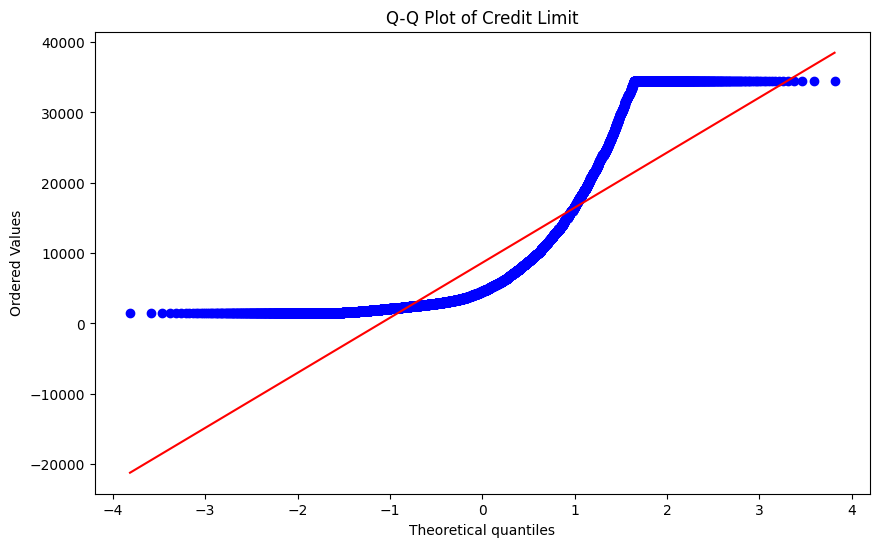

In [7]:
# Q-Q Plot for Credit_Limit
plt.figure(figsize=(10, 6))
stats.probplot(df['Credit_Limit'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Credit Limit')
plt.show()

Correlation of 'Customer_Age' with other numeric variables:
Customer_Age                1.000000
Months_on_book              0.788912
Months_Inactive_12_mon      0.054361
Total_Revolving_Bal         0.014780
CLIENTNUM                   0.007613
Avg_Utilization_Ratio       0.007114
Credit_Limit_Log            0.003965
Credit_Limit                0.002476
Avg_Open_To_Buy             0.001151
Total_Relationship_Count   -0.010931
Total_Ct_Chng_Q4_Q1        -0.012143
Contacts_Count_12_mon      -0.018452
Total_Trans_Amt            -0.046446
Total_Amt_Chng_Q4_Q1       -0.062042
Total_Trans_Ct             -0.067097
Dependent_count            -0.122254
Unnamed: 7                       NaN
Name: Customer_Age, dtype: float64

Variable most strongly correlated with 'Credit_Limit': Avg_Open_To_Buy


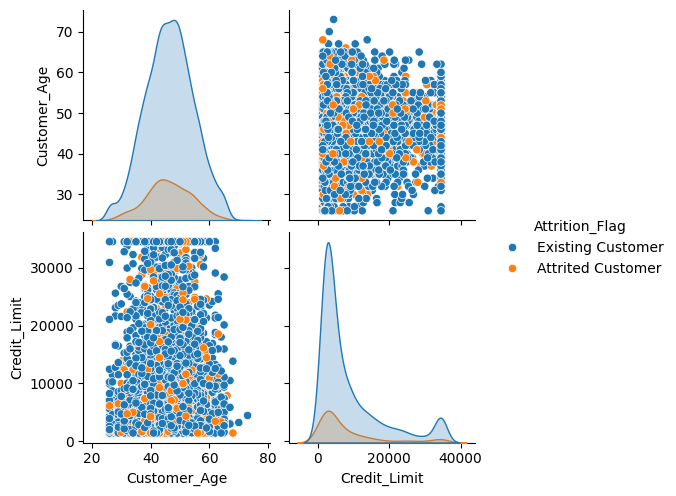

In [9]:
# Correlation Analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
customer_age_correlation = correlation_matrix['Customer_Age'].sort_values(ascending=False)
most_correlated_with_credit_limit = correlation_matrix['Credit_Limit'].abs().sort_values(ascending=False).index[1]

print("Correlation of 'Customer_Age' with other numeric variables:")
print(customer_age_correlation)
print(f"\nVariable most strongly correlated with 'Credit_Limit': {most_correlated_with_credit_limit}")

# Pair Plot Analysis
sampled_df = df.sample(n=5000, random_state=42)
sns.pairplot(sampled_df, vars=['Customer_Age', 'Credit_Limit'], hue='Attrition_Flag', diag_kind='kde')
plt.show()

In [10]:
from scipy.stats import mannwhitneyu

# Hypothesis Testing
# Null Hypothesis (H0): The median 'Credit_Limit' is the same for both churned and non-churned customers.
# Alternative Hypothesis (H1): The median 'Credit_Limit' is different for churned and non-churned customers.

# Separate the data into churned and non-churned customers
churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit']
non_churned = df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(churned, non_churned, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p_value}")

# Margin of Error Calculation
# Calculate the standard error of the difference in medians
n1 = len(churned)
n2 = len(non_churned)
se = np.sqrt((n1 + n2 + 1) / (12 * n1 * n2))

# Calculate the margin of error at 95% confidence level (Z-score for 95% confidence is 1.96)
margin_of_error = 1.96 * se

print(f"Margin of Error: {margin_of_error}")

Mann-Whitney U test statistic: 6361348.0
P-value: 3.0078405911217954e-07
Margin of Error: 0.015311722701627777


In [11]:
# Linear Regression Analysis
# Prepare the data
X = df[['Customer_Age', 'Total_Trans_Amt']]
y = df['Credit_Limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

# Feature Engineering
# Propose two additional features
df['Total_Trans_Amt_per_Month'] = df['Total_Trans_Amt'] / df['Months_on_book']
df['Credit_Limit_per_Trans'] = df['Credit_Limit'] / df['Total_Trans_Ct']

# Prepare the data with additional features
X = df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Amt_per_Month', 'Credit_Limit_per_Trans']]
y = df['Credit_Limit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model with additional features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model with additional features
r2_score = model.score(X_test, y_test)
print(f"R^2 Score with additional features: {r2_score}")

R^2 Score: 0.03138038504200391
R^2 Score with additional features: 0.6805866389722603
